<a href="https://colab.research.google.com/github/cristinarainich/Child-Mind-Institute-Project/blob/main/pheno_data_finalquery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Updated** 19/05/2025 17:00

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import math
import re
import pylab as pl
from itertools import combinations
import seaborn as sns
from scipy import stats
from collections import defaultdict
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
sns.set()

In [ ]:
working_path = Path('/content/drive/MyDrive/KKNV/CMI')

In [ ]:
cd /content/drive/MyDrive/KKNV

/content/drive/MyDrive/KKNV


In [ ]:
!ls /content/drive/MyDrive/KKNV

 11a5490b-0e2d-4fd7-b54e-e2ebd0a72df6.zip
 2024-07_ReDyslexia_Rekrutierung_Klinische_Studie.xlsx
 CMI
 comorbidity
 data
 data106.csv
'files sharing.docx'
'JC 13.05.2025.pptx'
'JC 21.01.2025.pptx'
'Methods 13.05.gslides'
 old
 Pilot.csv
'Pilot reading task.gsheet'
 protocols
 ReDyslexia_retreat.pptx
 StructuralconnectivityinLGN_kvk_ss.docx
 tasks
 Temporal_Frequency_Staircase_V3_gamified_L2R_Ilia.eve
 thresholds.csv
 thresholds.gsheet
 va_finaldraft.docx


## Pipeline to make the data convinient to use

Here we are going to use the full and the most recent dataset.

In [ ]:
# our dataset
data = pd.read_csv(
    working_path.joinpath('query_September2024.csv'),
    index_col=None,
    low_memory=False
)

In [ ]:
data.shape

(6687, 791)

In [ ]:
ids = data.Identifiers.values
new_ids = []
for i in ids:
  new_i = i.replace(',assessment', '')
  new_ids.append(new_i)
print(len(ids))
print(len(new_ids))

data['Identifiers'] = new_ids

6687
6687


In [ ]:
data = data.drop(labels=0, axis=0)

In [ ]:
data.head()

,Identifiers,"Barratt,Barratt_P1_Edu","Barratt,Barratt_P1_Occ","Barratt,Barratt_P2_Edu","Barratt,Barratt_P2_Occ","Barratt,Barratt_Total","Barratt,Barratt_Total_Edu","Barratt,Barratt_Total_Occ","Barratt,financialsupport","Basic_Demos,Age",...,"WISC_Remote,WISC_VCI_Sum","WISC_Remote,WISC_VP_Raw","WISC_Remote,WISC_VP_Scaled","WISC_Remote,WISC_Vocab_Raw","WISC_Remote,WISC_Vocab_Scaled","WISC_Remote,WISC_WMI","WISC_Remote,WISC_WMI_Percentile","WISC_Remote,WISC_WMI_Sum","WISC_Remote,WISC_complete","WISC_Remote,WISC_incomplete_reason"
1,NDARAA075AMK,21,30,21,45,58.5,21,37.5,3,6.72804,...,.,.,.,.,.,.,.,.,.,.
2,NDARAA112DMH,18,30,12,15,37.5,15,22.5,3,5.545744,...,.,.,.,.,.,.,.,.,.,.
3,NDARAA117NEJ,12,5,3,5,12.5,7.5,5,3,7.475929,...,.,.,.,.,.,.,.,.,.,.
4,NDARAA306NT2,21,15,15,15,33,18,15,3,21.216746,...,.,.,.,.,.,.,.,.,.,.
5,NDARAA504CRN,21,40,NaN,NaN,61,21,40,1,9.165297,...,.,.,.,.,.,.,.,.,.,.


The Identifiers at the end of the table contain additional visits of some of the subjects. We need to incorporate this information to the original data entries. The snap of the code below is an example of this occuring in the data.

In [ ]:
data['Identifiers'].values[6000:6200]

array(['NDARPX155RF3_Visit_2', 'NDARPX155RF3_Visit_3',
       'NDARPX219TW0_Visit_1', 'NDARPX219TW0_Visit_2',
       'NDARPX219TW0_Visit_3', 'NDARPZ621ZLE_Visit_3',
       'NDARRA717GYV_Visit_1', 'NDARRA717GYV_Visit_2',
       'NDARRA733VWX_Visit_1', 'NDARRA733VWX_Visit_2',
       'NDARRA733VWX_Visit_3', 'NDARRA733VWX_Visit_4',
       'NDARRB942UWU_Visit_1', 'NDARRB942UWU_Visit_2',
       'NDARRB942UWU_Visit_3', 'NDARRC190NKB_Visit_1',
       'NDARRC190NKB_Visit_2', 'NDARRC190NKB_Visit_3',
       'NDARRC819NLC_Visit_1', 'NDARRC819NLC_Visit_2',
       'NDARRC819NLC_Visit_3', 'NDARRD326KB9_Visit_1',
       'NDARRD326KB9_Visit_2', 'NDARRD326KB9_Visit_3',
       'NDARRD720XZK_Visit_1', 'NDARRD720XZK_Visit_2',
       'NDARRD720XZK_Visit_3', 'NDARRF897HB5_Visit_1',
       'NDARRF897HB5_Visit_2', 'NDARRF897HB5_Visit_3',
       'NDARRG199RU4_Visit_2', 'NDARRG199RU4_Visit_3',
       'NDARRG415BJM_Visit_1', 'NDARRG415BJM_Visit_2',
       'NDARRG415BJM_Visit_3', 'NDARRH407MEY_Visit_1',
       'ND

In [ ]:
versions = []
for i in data.Identifiers.values.tolist():
  if '_' in i:
    versions.append(i)
print(len(versions))

1819


In [ ]:
columns = data.columns
i = 0
for id in versions:
  values = data[data['Identifiers'] == id].values.tolist()
  while len(values) == 1:
    values = values[0]
  for value in values[1:]:
    if value != '.':
      if type(value) == str:
        column_number = values.index(value)
        row_number = data[data['Identifiers'] == id[:12]].index[0]
        data.at[row_number, columns[column_number]] = value
      elif type(value) != str and math.isnan(value) is not True:
        column_number = values.index(value)
        row_number = data[data['Identifiers'] == id[:12]].index[0]
        data.at[row_number, columns[column_number]] = value
      else:
        if math.isnan(value) is not True:
          print(value, type(value))
  i += 1
print(i)

1819


In [ ]:
for id in versions:
  data = data[data['Identifiers'] != id]
data.shape

(4867, 791)

In [ ]:
# checking for duplicates
num_col_duplicates = data['Identifiers'].duplicated().sum()
print(f'Number of duplicates in column "Identifiers": {num_col_duplicates}')

Number of duplicates in column "Identifiers": 0


In [ ]:
# we also have a column Basic Demos, EID that contain identifiers. Let's cross reference to check whether there are any discrepancies
ids1 = data['Identifiers'].values
ids2 = data['Basic_Demos,EID'].values
print(len(ids1))
print(len(ids2))
for i in range(0, len(ids1)):
  if ids1[i] != ids2[i]:
    print(ids1, ids2)
    break

4867
4867


In [ ]:
# I noticed that some of the identifiers name might have an empty space in the name, let's check
ids = data['Identifiers'].values
with_space = []
for i in ids:
  if ' ' in i:
    print(i)
    with_space.append(i)
for each in with_space:
  ind = data[data['Identifiers'] == each].index[0]
  data.loc[ind, 'Identifiers'] = each[:-1]


NDARAL828WXM 
NDARCP952HZA 


In [ ]:
data.columns

Index(['Identifiers', 'Barratt,Barratt_P1_Edu', 'Barratt,Barratt_P1_Occ',
       'Barratt,Barratt_P2_Edu', 'Barratt,Barratt_P2_Occ',
       'Barratt,Barratt_Total', 'Barratt,Barratt_Total_Edu',
       'Barratt,Barratt_Total_Occ', 'Barratt,financialsupport',
       'Basic_Demos,Age',
       ...
       'WISC_Remote,WISC_VCI_Sum', 'WISC_Remote,WISC_VP_Raw',
       'WISC_Remote,WISC_VP_Scaled', 'WISC_Remote,WISC_Vocab_Raw',
       'WISC_Remote,WISC_Vocab_Scaled', 'WISC_Remote,WISC_WMI',
       'WISC_Remote,WISC_WMI_Percentile', 'WISC_Remote,WISC_WMI_Sum',
       'WISC_Remote,WISC_complete', 'WISC_Remote,WISC_incomplete_reason'],
      dtype='object', length=791)

Let's now work on individual columns to make them more convinient for screening

In [ ]:
# we have a column "Participant Status" that contains information on whether
# a person dropped out or been lost to follow up
status = data['Basic_Demos,Participant_Status'].unique()
for each in status:
  number = data[data['Basic_Demos,Participant_Status'] == each].shape[0]
  print('Number of ' + each + ': ' + str(number))

Number of Complete: 4241
Number of Lost to follow-up: 269
Number of Dropout: 357


In [ ]:
#working on Basic_Demos columns
data['Basic_Demos,Age'] = data['Basic_Demos,Age'].astype(float)
data['Basic_Demos,Sex'] = data['Basic_Demos,Sex'].astype(int)
data.drop(['Basic_Demos,Site'], axis=1, inplace = True) # contain only nan values
data['Basic_Demos,Study_Site'] = data['Basic_Demos,Study_Site'].astype(int)

In [ ]:
# Barrat score
number = data[data['Barratt,Barratt_Total'] == '.'].shape[0]
print('Missing values for Barrat scores: ' + str(number) + ' out of ' + str(data.shape[0]))

Missing values for Barrat scores: 434 out of 4867


In [ ]:
# CELF tests
# if we end up using it, it might make sense to check the validity first in CELF_Valid
data['CELF,CELF_Total'] = data['CELF,CELF_Total'].fillna('.')
number = data[data['CELF,CELF_Total'] == '.'].shape[0]
print('Missing values for CELF scores: ' + str(number) + ' out of ' + str(data.shape[0]))

Missing values for CELF scores: 662 out of 4867


In [ ]:
# CTOPP-2
# don't trust the 'complete' field, the ones with number 2 are both who completed some sets and who did nothing
data['CTOPP,CTOPP_Complete'] = data['CTOPP,CTOPP_Complete'].fillna('.')
number = data[data['CTOPP,CTOPP_Complete'] != '1'].shape[0]
print('Missing values for CTOPP-2 scores: ' + str(number) + ' out of ' + str(data.shape[0]))

names = ['CTOPP,CTOPP_BW_D', 'CTOPP,CTOPP_BW_P',
       'CTOPP,CTOPP_BW_R', 'CTOPP,CTOPP_BW_S',
       'CTOPP,CTOPP_EL_D', 'CTOPP,CTOPP_EL_P', 'CTOPP,CTOPP_EL_R',
       'CTOPP,CTOPP_EL_S', 'CTOPP,CTOPP_NR_D', 'CTOPP,CTOPP_NR_P',
       'CTOPP,CTOPP_NR_R', 'CTOPP,CTOPP_NR_S', 'CTOPP,CTOPP_RD_D',
       'CTOPP,CTOPP_RD_P', 'CTOPP,CTOPP_RD_R', 'CTOPP,CTOPP_RD_S',
       'CTOPP,CTOPP_RL_D', 'CTOPP,CTOPP_RL_P', 'CTOPP,CTOPP_RL_R',
       'CTOPP,CTOPP_RL_S', 'CTOPP,CTOPP_RO_D', 'CTOPP,CTOPP_RO_P',
       'CTOPP,CTOPP_RO_R', 'CTOPP,CTOPP_RO_S', 'CTOPP,CTOPP_RSN_Comp',
       'CTOPP,CTOPP_RSN_D', 'CTOPP,CTOPP_RSN_P', 'CTOPP,CTOPP_RSN_Sum']

for name in names:
  data[name] = data[name].fillna('.') # filling nan values if any

ctopp = []
ids = data.Identifiers.values.tolist()
for id in ids:
  subset = data[data['Identifiers'] == id]
  tests = []
  for name in names:
    if subset[name].values[0] != '.':
      tests.append(name)
  if len(tests) == 28:
    ctopp.append('full')
  elif len(tests) == 0:
    ctopp.append('missing')
  else:
    new_tests = ''
    for each in tests:
      new_tests = new_tests + each[12:] + ', '
    ctopp.append(new_tests)
data['CTOPP'] = ctopp

Missing values for CTOPP-2 scores: 805 out of 4867


In [ ]:
# DailyMeds
# we have people who have taken medication, drugs, or alcohol

print('Drugs: ', data['DailyMeds,drugs'].unique()) # value '.' and 2 contains only nan values and '.'
#data[data['DailyMeds,drugs'] == '1'][['DailyMeds,drugs_01', 'DailyMeds,drugs_02']] # to check the drugs

print('Alcohol: ', data['DailyMeds,alcohol'].unique()) # value '.' and 2 contains only nan values and '.'
#data[data['DailyMeds,alcohol'] == '1'][['DailyMeds,alc_01', 'DailyMeds,alc_02']] # to check alcohol (only one person)

print('Meds: ', data['DailyMeds,medications'].unique()) # DO NOT TRUST THE SCORES, only look at the names and doses

data['DailyMeds,med_name_01'] = data['DailyMeds,med_name_01'].fillna('.') # have ' ', nan, and '.' values
data['DailyMeds,med_name_02'] = data['DailyMeds,med_name_02'].fillna('.') # have '.' and nan values
data['DailyMeds,med_name_03'] = data['DailyMeds,med_name_03'].fillna('.') # have '.' and nan values

meds1 = data['DailyMeds,med_name_01'].values.tolist() # have ' ' and '.' values
meds2 = data['DailyMeds,med_name_02'].values.tolist() # have '.' values
meds3 = data['DailyMeds,med_name_03'].values.tolist() # have '.' values
medications = []
for i in range(0, data.shape[0]):
  status = 0
  if meds1[i] != '.':
    if meds1[i] != ' ':
      status += 1
    elif meds1[i] == ' ':
      status = 0
  elif meds1[i] == '.':
    if meds2[i] != '.':
      status += 1
    elif meds2[i] == '.':
      if meds3[i] != '.':
        status += 1
  if status != 0:
    medications.append(1)
  else:
    medications.append(0)

data['DailyMeds,medications'] = medications # created a new coding depending on whether there are any entries in drug names

Drugs:  ['2' '.' '0' '1']
Alcohol:  ['2' '.' '0' '1']
Meds:  ['1' '.' '0']


In [ ]:
# Diagnosis_ClinicianConsensus
# getting rid of nan values everywhere
names = ['ByHx', 'Cat', 'Code', 'Confirmed', 'New', 'PRem', 'Past_Doc', 'Presum', 'RC', 'Rem', 'RuleOut', 'Spec', 'Sub', 'Time']
data['Diagnosis_ClinicianConsensus,NoDX'] = data['Diagnosis_ClinicianConsensus,NoDX'].fillna('.')
for number in range(1, 11):
  if number != 10:
    column = 'Diagnosis_ClinicianConsensus,DX_0' + str(number)
  else:
    column = 'Diagnosis_ClinicianConsensus,DX_10'
  data[column] = data[column].fillna('.') # here we deal with only main column names
  for name in names:
    column_add = column + '_' + name
    data[column_add] = data[column_add].fillna('.')

We need to identify who is control and who is dyslexic and who has nothing to do with these categories. Control participants have the status of 'No Diagnosis Given' in the DX_01 and in the NoDX (the indicator 1). We need to push together the diagnoses from all of the 10 columns, consider the degree of certainty for these diagnosis and whether it is a confirmed status or not, and then create the column with values stating what group a particular participant is attributed to. As a result, I would like to have a status column saying that it is a drop out, control, just dyslexic, dyslexic with comorbidities or orther disorder. And then I would like to have a separate column that would include all the list of diagnoses for people who are not drop outs and controls.

We have the following variabilities in the diagnosis of SLI: ['Specific Learning Disorder with Impairment in Reading',
 'Specific Learning Disorder with Impairment in Mathematics',
 'Specific Learning Disorder with Impairment in Written Expression',
 'Specific Learning Disorder with Impairment in Reading ',
 'Specific Learning Disorder with Impairment in Mathematics ']. In the code we will account for this, as we would like to have the specific type of DD known.

In [ ]:
from types import EllipsisType
 # Diagnosis_ClinicianConsensus
def diagnosis(df):
  df['Diagnosis_ClinicianConsensus,NoDX'] = df['Diagnosis_ClinicianConsensus,NoDX'].fillna('.')

  status = [] # will contain information on whether it is control, dropout, DD with/without comorbidities, other
  all_diagnoses = [] # will contain all the diagnoses
  type_DD = [] # will contain the type of DD
  certainty_records = [] # will contain the info on whether the diagnosis is confirmed
  adhd = [] # will contain the infor whether there is an adhd diagnosis
  intel_disability = [] # intellectual disability or autism

  sld_type_mapping = {
    "Specific Learning Disorder with Impairment in Reading": "Reading",
    "Specific Learning Disorder with Impairment in Mathematics": "Math",
    "Specific Learning Disorder with Impairment in Written Expression": "Writing"
    }

  for i in range(0, df.shape[0]): # going through all the data
    #print('New Subject')
    subset = df.iloc[i] # a particular raw will all the values
    #print(subset[['Diagnosis_ClinicianConsensus,DX_01', 'Diagnosis_ClinicianConsensus,DX_02', 'Diagnosis_ClinicianConsensus,DX_03',
    #              'Diagnosis_ClinicianConsensus,DX_04', 'Diagnosis_ClinicianConsensus,DX_05', 'Diagnosis_ClinicianConsensus,DX_06',
    #              'Diagnosis_ClinicianConsensus,DX_07', 'Diagnosis_ClinicianConsensus,DX_08', 'Diagnosis_ClinicianConsensus,DX_09',
    #              'Diagnosis_ClinicianConsensus,DX_10']])
    noDX = subset['Diagnosis_ClinicianConsensus,NoDX'] # 3 - drop out; 1 - control; 2, ' ', '.' - some diagnosis
    if noDX == '3': # if subject is a drop out
      status.append('Dropout')
      all_diagnoses.append('N/A')
      type_DD.append('N/A')
      adhd.append('N/A')
      intel_disability.append('N/A')
      #DD_certainty.append('N/A')
    elif noDX == '1': # No Diagnosis Given
      status.append('Control')
      all_diagnoses.append('N/A')
      type_DD.append('N/A')
      #DD_certainty.append('N/A')
      adhd.append('N/A')
      intel_disability.append('N/A')
    else: # when noDX = 2, '.', or ' ' it has a diagnosis
      # here we are going to consider all the columns that contain the name of diagnosis
      subset_dys = 0 # a counter on how many dd types a person has
      subset_dystype = '' # a string where dd type will be recorded
      subset_diagnosis = '' # a string where all of the diagnoses will be recorded
      index = 0 # just for simplicity of going through loops
      subset_certainty = '' # records type of certainty of DD diagnosis
      subset_certaintycount = 0 # counts
      subset_adhd = 0 #adhd index
      subset_disability = 0
      for number in range(1, 11): # we are going one by one through all the diagnosis columns
        if number != 10:
          name_diag = 'Diagnosis_ClinicianConsensus,DX_0' + str(number)
          name_conf = 'Diagnosis_ClinicianConsensus,DX_0' + str(number) + '_Confirmed'
          name_presum = 'Diagnosis_ClinicianConsensus,DX_0' + str(number) + '_Presum'
          name_rc = 'Diagnosis_ClinicianConsensus,DX_0' + str(number) + '_RC'
          name_ruleout = 'Diagnosis_ClinicianConsensus,DX_0' + str(number) + '_RuleOut'
        elif number == 10:
          name_diag = 'Diagnosis_ClinicianConsensus,DX_10'
          name_conf = 'Diagnosis_ClinicianConsensus,DX_10' + '_Confirmed'
          name_presum = 'Diagnosis_ClinicianConsensus,DX_10' + '_Presum'
          name_rc = 'Diagnosis_ClinicianConsensus,DX_10' + '_RC'
          name_ruleout = 'Diagnosis_ClinicianConsensus,DX_10' + '_RuleOut'

        diagnosis = subset[name_diag] # getting the name of the diagnosis
        conf = subset[name_conf] # whether it is confirmed
        presum = subset[name_presum] # whether it is presumptive
        rc = subset[name_rc] # whether it requires confirmation
        ruleout = subset[name_ruleout] # whether it needs to be ruled out

        if 'No Diagnosis' in diagnosis: # when something is off and no diagnosis detected outside of the noDX values 1 and 3
            print('ERROR: No Diagnosis detected')
            print('The row: ', i, ' ', name_diag, diagnosis)
            break
        # now we should cover all the cases with the type of diagnosis
        elif diagnosis == '.':
            index += 1
        elif diagnosis == ' ':
            index += 1
        else:
          # if diagnosis variable contains an actual diagnosis
          # if it's SLD with impairment in something
          if 'Specific Learning Disorder with' in diagnosis:
              subset_dys += 1 # adds to the counter of dyslexia types in the same participant
              subset_dystype = subset_dystype + diagnosis + '; ' # records the type
              # here we need to understand the certainty of the DD diagnosis
              certainty_info = {
                    'ID': subset['Identifiers'],
                    'diagnosis': subset_dystype,
                    'certainty': []
              }
              if conf == '1':
                certainty_info['certainty'].append('Confirmed')
              if presum == '1':
                certainty_info['certainty'].append('Presumptive')
              if rc == '1':
                certainty_info['certainty'].append('Requires Confirmation')
              if ruleout == '1':
                certainty_info['certainty'].append('Ruleout')

              # If no certainty level is provided, add 'No information'
              if not certainty_info['certainty']:
                certainty_info['certainty'].append('No information')

              certainty_records.append(certainty_info)

          # if diagnosis has nothing to do with SLD
          else:
            subset_diagnosis = subset_diagnosis + diagnosis + '; '
            if 'Attention-Deficit' in diagnosis:
              subset_adhd += 1
            elif 'ADHD' in diagnosis:
              subset_adhd += 1
            if 'Intellectual Disability' in diagnosis:
              subset_disability += 1
            if 'Autism' in diagnosis:
              subset_disability += 1

      # We are now done withh all of the columns with diagnosis, now we need to form the following groups of subjects
      # dyslexic without comorbidities
      # dyslexic with comorbidities
      # other diagnosis
      counter = 0
      if subset_dys == 0: # a person doesn't have DD
        if subset_dystype == '':
          type_DD.append('N/A')
          #DD_certainty.append('N/A')
          if subset_diagnosis != '':
            status.append('Other diagnosis')
            all_diagnoses.append(subset_diagnosis)
          else:
            status.append('All dots')
            all_diagnoses.append('N/A')
        else:
          print('ERROR: dys = 0 but dys type not')
          print(i, subset, subset_dystype, subset_dys, subset_diagnosis)
          break

      else: # if there is a DD diagnosis
        # for us to differentiate between clear DD and DD with comorbidities
        if subset_diagnosis == '': # only DD was detected in Diagnosis columns
          status.append('DD')
          all_diagnoses.append(subset_dystype)
        elif subset_diagnosis != '':
          status.append('DD with comorbidities')
          new_inter_diag = subset_dystype + subset_diagnosis
          all_diagnoses.append(new_inter_diag)

        found_sld_types = []
        for full_name, short_name in sld_type_mapping.items():
          if re.search(full_name, subset_dystype):
            found_sld_types.append(short_name)
        # Get unique short SLD types.
        found_sld_types = list(set(found_sld_types))

        if len(found_sld_types) == 1:
          type_DD.append(found_sld_types[0])
          #DD_certainty.append(subset_certainty)
        else:
          new_sld_type = ''
          for each in found_sld_types:
            new_sld_type = new_sld_type + each + ' '
          type_DD.append(new_sld_type)
          #DD_certainty.append(subset_certainty)

      if subset_adhd == 0:
        adhd.append(0)
      else:
        adhd.append(subset_adhd)

      if subset_disability == 0:
        intel_disability.append(0)
      else:
        intel_disability.append(subset_disability)

  return status, all_diagnoses, type_DD, certainty_records, adhd, intel_disability

In [ ]:
 status, all_diagnoses, type_DD, certainty_records, adhd, intel_disability = diagnosis(data)
 data['Group'] = status
 data['Diagnosis'] = all_diagnoses
 data['DD'] = type_DD
 #data['DD_Certainty'] = DD_certainty
 data['ADHD'] = adhd
 data['Intellectual_Disability'] = intel_disability

<ipython-input-28-cf18fc4126fd>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Group'] = status
<ipython-input-28-cf18fc4126fd>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Diagnosis'] = all_diagnoses
<ipython-input-28-cf18fc4126fd>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

In [ ]:
data.groupby(['Group'])[['Identifiers']].count()

,Identifiers
Group,
All dots,105
Control,373
DD,136
DD with comorbidities,944
Dropout,526
Other diagnosis,2783


In [ ]:
# Drug Screen
# 0 = negative, 1 = positive
drugscreens = ['DrugScreen,AMP500', 'DrugScreen,BAR300', 'DrugScreen,BUP10',
       'DrugScreen,BZO300', 'DrugScreen,COC150', 'DrugScreen,MAMP500',
       'DrugScreen,MDMA500', 'DrugScreen,MTD300', 'DrugScreen,OPI300',
       'DrugScreen,OXY100', 'DrugScreen,PCP25', 'DrugScreen,PPX300',
       'DrugScreen,TCA1000', 'DrugScreen,THC50', 'DrugScreen,perscribed']
for drug in drugscreens:
  data[drug] = data[drug].fillna('.')
  print('Name of the screen: ', drug, 'Number of subjects with positive test: ', data[data[drug] == '1'].shape[0])


Name of the screen:  DrugScreen,AMP500 Number of subjects with positive test:  51
Name of the screen:  DrugScreen,BAR300 Number of subjects with positive test:  2
Name of the screen:  DrugScreen,BUP10 Number of subjects with positive test:  1
Name of the screen:  DrugScreen,BZO300 Number of subjects with positive test:  10
Name of the screen:  DrugScreen,COC150 Number of subjects with positive test:  1
Name of the screen:  DrugScreen,MAMP500 Number of subjects with positive test:  3
Name of the screen:  DrugScreen,MDMA500 Number of subjects with positive test:  1
Name of the screen:  DrugScreen,MTD300 Number of subjects with positive test:  1
Name of the screen:  DrugScreen,OPI300 Number of subjects with positive test:  16
Name of the screen:  DrugScreen,OXY100 Number of subjects with positive test:  2
Name of the screen:  DrugScreen,PCP25 Number of subjects with positive test:  1
Name of the screen:  DrugScreen,PPX300 Number of subjects with positive test:  1
Name of the screen:  Drug

In [ ]:
# EHQ
handedness = data['EHQ,EHQ_Total'].values
new_handedness = []
for value in handedness:
  if value != '.':
    new_handedness.append(float(value))
  else:
    new_handedness.append(value)
data['EHQ,EHQ_Total'] = new_handedness

In [ ]:
# EVT
# if we end up using it, it might make sense to check the validity first in EVT_Valid
data['EVT,EVT_Valid'] = data['EVT,EVT_Valid'].fillna('.')
number = data[data['EVT,EVT_Complete'] != '1'].shape[0]
print('Missing values for EVT scores: ' + str(number) + ' out of ' + str(data.shape[0]))

Missing values for EVT scores: 4528 out of 4867


In [ ]:
# GFTA
data['GFTA,GFTA_2_Complete'] = data['GFTA,GFTA_2_Complete'].fillna('.')
number = data[data['GFTA,GFTA_2_Complete'] != '1'].shape[0]
print('Missing values for GFTA_2 scores: ' + str(number) + ' out of ' + str(data.shape[0]))

Missing values for GFTA_2 scores: 4832 out of 4867


In [ ]:
# MRI Track
# Complete: 1 = All done, 2 = some scans complete, 3 = no scanc complete
# Clinical Impression: 1 = Within Normal Limits, 2 = Findings Not Clinically Significant, 3 = Abnormal
# RS: resting state complete 0 = No 1 = Yes 2 = Partial
# Movie, T1-W, T2 Flair, DWI_PAAX, DWI_APAX
names = ['Clinical_Impression', 'Complete', 'DKI64', 'DWI_APAX', 'DWI_PAAX', 'RS']
for name in names:
  col_name = 'MRI_Track,' + name
  data[col_name] = data[col_name].fillna('.')
  if name == 'Complete':
    print('Completed ', data[data[col_name] == '1'].shape[0], ' participants out of ', data.shape[0])
  elif name == 'Clinical_Impression':
    print('Within normal limits: ', data[data[col_name] == '1'].shape[0])
    print('Findings Not Clinically Significant: ', data[data[col_name] == '2'].shape[0])
    print('Abnormal: ', data[data[col_name] == '3'].shape[0])
  else:
    print(name, 'done ', data[data[col_name] == '1'].shape[0], 'out of ', data.shape[0])

Within normal limits:  2924
Findings Not Clinically Significant:  281
Abnormal:  207
Completed  2635  participants out of  4867
DKI64 done  2968 out of  4867
DWI_APAX done  682 out of  4867
DWI_PAAX done  942 out of  4867
RS done  3015 out of  4867


In [ ]:
# PreInt Language
data['PreInt_Lang,Child_Primary_Lang'] = data['PreInt_Lang,Child_Primary_Lang'].fillna('.')
data[data['PreInt_Lang,Child_Primary_Lang'] != '.'].groupby(['PreInt_Lang,Child_Primary_Lang'])['Identifiers'].count()

,Identifiers
"PreInt_Lang,Child_Primary_Lang",
Bilingual,1
Bilungual,1
Both (B+E),1
Bulgarian,1
Chinese - Mandarin,1
ENglish,1
English,3135
English,38
English and French,1


In [ ]:
# PreINT, past head injuries
data['PreInt_TxHx,head_injuries'] = data['PreInt_TxHx,head_injuries'].fillna('.')
print('Head injuries: ', data[data['PreInt_TxHx,head_injuries'] == '1'].shape[0])

Head injuries:  629


In [ ]:
# PreInt psych meds curr
data['PreInt_TxHx,psych_meds_cur'] = data['PreInt_TxHx,psych_meds_cur'].fillna('.')
print('Psych meds: ', data[data['PreInt_TxHx,psych_meds_cur'] == '1'].shape[0])

Psych meds:  794


In [ ]:
# RAN-RAS
# numbers:
# letters:
data['RANRAS,RR_Let_Stnd'] = data['RANRAS,RR_Let_Stnd'].fillna('.') # letters
data['RANRAS,RR_Num_Stnd'] = data['RANRAS,RR_Num_Stnd'].fillna('.') # numbers
data['RANRAS,RR_Let_Raw'] = data['RANRAS,RR_Let_Raw'].fillna('.')
data['RANRAS,RR_Num_Raw'] = data['RANRAS,RR_Num_Raw'].fillna('.')

print('RAN letters (stnd.): ', data[data['RANRAS,RR_Let_Stnd'] != '.'].shape[0], 'out of ', data.shape[0])
print('RAN letters (raw): ', data[data['RANRAS,RR_Let_Raw'] != '.'].shape[0], 'out of ', data.shape[0])
print('RAN numbers (stnd.): ', data[data['RANRAS,RR_Num_Stnd'] != '.'].shape[0], 'out of ', data.shape[0])
print('RAN numbers (raw): ', data[data['RANRAS,RR_Num_Raw'] != '.'].shape[0], 'out of ', data.shape[0])

RAN letters (stnd.):  235 out of  4867
RAN letters (raw):  235 out of  4867
RAN numbers (stnd.):  51 out of  4867
RAN numbers (raw):  51 out of  4867


**KBIT**: IQ_Comp, IQ_Desc, IQ_P, NV_Desc, NV_P, NV_Raw, NV_Stansard, V_Desc, V_P, V_Raw, V_Standard



**WASI**: BD_Raw, BD_T, FSIQ, FSIQ_P, Matrix_Raw, Matrix_T, PRI_Comp, PRI_P, PRI_T, Sim_Raw, Sim_T, VCI_Comp, VCI_P, VCI_T, Vocab_Raw, Vocab_T.  

**WAIS**: SO, we have the following categories name of the test_PERC, name of the test_RANGE, name of the test_RAW, name of the test_SCALE .... for the follwoung tests: ARITH, BD, CODE, DS, FSIQ, INFO, MR, PRI, PSI, SIM, SS, VCI, VOCAB, VP, WMI. We also have an additional WAIS_Abb test with sliglthly different naming convention: CODE_R, CODE_S, DS_B_L, DS_B_R, DS_F_L, DS_F_R, DS_S_L, DS_S_R, DS_Total_R, DS_Total_S, PSI_Comp, PSI_P, PSI_Sum, SYM_R, SYM_S

**WISC**: BD_Raw, BD_Scaled, Coding_Raw, Coding_Scaled, DS_Raw, DS_Scaled, FRI, FRI_Percentile, FRI_Sum, FSIQ, FSIQ_Percentile, FSIQ_Sum, FW_Raw, FW_Scaled, MR_Raw, MR_scaled, PSI, PSI_Percentile, PSI_Sum, PS_Raw, PS_Scaled, SS_Raw, SS_Scaled, Similarities_Raw, Similarities_Scaled, VCI, VCI_Percentile, VCI_Sum, VP_Raw, VP_Scaled, VCI, VSI_Percentile, VSI_Sum, Vocab_Raw, Vocab_Scaled, WMI, WMI_Percentile, WMI_Sum, DS_Raw, DS_Scaled, FRI, FRI_Percentile, FRI_Sum. Then we also have the remote version of this IQ test and here are the names of the tests: FW_Raw, FW_Scaled, Int_BD_Raw, Int_BD_Scaled, LNS_Raw, LNS_Scaled, MR_Raw, MR_Scaled, NMFSIQ, NMFSIQ_Percentile, NMFSIQ_Sum, NMVSI, NMVSI_Percentile, NMVSI_Sum, NSI, NSI_Percentile, NSI_Sum, NSL_Raw, NSL_Stnd, NSQ_Raw, NSQ_Scaled, NSQ_Stnd, Similarities_Raw, Similarities_Scaled, VCI, VCI_Percentile, VCI_Sum, VP_Raw, VP_Scaled, Vocab_Raw, Vocab_Scaled, WMI, WMI_Percentile, WMI_Sum       

**WIAT**: LCODC_P, LCODC_Raw, LCODC_Stnd, LCRV_P, LCRV_Raw, LCRV_Std, LC_P, LC_Stnd, MP_P, MP_Raw, MP_Stnd, Num_P, Num_Raw, Num_Stnd, Pseudo_P, Pseudo_Raw, Pseudo_Stnd, RC_P, RC_Raw, RC_Stnd, Spell_P, Spell_Raw, Spell_Stnd, Word_P,Word_Raw, Word_Stnd

In [ ]:
# IQ tests
def IQ_tests(df):
  kbit_columns = ['IQ_Comp', 'Incomplete_Reason', 'Invalid_Reason', 'Valid', 'Complete',
             'NV_Standard', 'V_Standard']
  wasi_columns = ['Complete', 'Valid', 'incomplete_reason', 'Invalid_Reason',
                  'FSIQ', 'PRI_Comp', 'VCI_Comp']
  wais_columns = ['Complete', 'Valid', 'Incomplete_Reason', 'Invalid_Reason',
                  'FSIQ_COMP', 'PRI_COMP', 'VCI_COMP']
  wisc_columns = ['complete', 'incomplete_reason', 'VCI', 'PSI', 'FSIQ']
  wisc_remote_columns = ['complete', 'incomplete_reason', 'VCI', 'NSI', 'NMFSIQ'] # NSI instead of PSI, no processing speed in this one, only naming speed
  wiat_columns = ['Complete', 'Valid', 'Incomplete_reason', 'Invalid_Reason',
                  'Pseudo_Stnd', 'Word_Stnd', 'RC_Stnd'] # decide on the subtests and whether standard

  columns = [kbit_columns, wasi_columns, wais_columns, wisc_columns, wisc_remote_columns, wiat_columns]
  col_names = ['KBIT,KBIT_', 'WASI,WASI_', 'WAIS,WAIS_', 'WISC,WISC_', 'WISC_Remote,WISC_', 'WIAT,WIAT_']
  for col_list in columns:
    ind_name = columns.index(col_list)
    for name in col_list:
      col_name = col_names[ind_name] + name
      df[col_name] = df[col_name].fillna('.')

  all_iq_tests = []
  iq_tests = []
  iq_score = []
  nv_iq = []
  v_iq = []
  status = []
  total_reading = []
  total_reading_status = []
  for i in range(0, df.shape[0]):
    subset = df.iloc[i] # a particular raw will all the values
    age = subset['Basic_Demos,Age']
    inter_iq_test = []
    inter_iq_score = []
    inter_iq_status = []
    inter_nv = []
    inter_v = []

    # KBIT
    kbit_score = subset['KBIT,KBIT_IQ_Comp']
    kbit_complete = subset['KBIT,KBIT_Complete']
    kbit_valid = subset['KBIT,KBIT_Valid']
    kbit_nv = subset['KBIT,KBIT_NV_Standard']
    kbit_v = subset['KBIT,KBIT_V_Standard']
    if kbit_score != '.': # only if we have a calculated composite score
      inter_iq_test.append('KBIT')
      inter_iq_score.append(int(kbit_score))
      inter_nv.append(int(kbit_nv)) # need to check whether there are cases where we have composite score, but do not have separate v erbal and non verbal scores
      inter_v.append(int(kbit_v))
      if kbit_complete == '1' and kbit_valid == '1':
        inter_iq_status.append('Complete and Valid')
      elif kbit_complete == '1' and kbit_valid == '0':
        inter_iq_status.append('Complete and Not valid')
      elif kbit_complete == '0' and kbit_valid == '0':
        inter_iq_status.append('Not complete and Not valid')
      else:
         inter_iq_status.append('N/A')

    # WASI
    wasi_score = subset['WASI,WASI_FSIQ']
    wasi_complete = subset['WASI,WASI_Complete']
    wasi_valid = subset['WASI,WASI_Valid']
    wasi_nv = subset['WASI,WASI_PRI_Comp']
    wasi_v = subset['WASI,WASI_VCI_Comp']
    if wasi_score != '.': # only if we have a calculated composite score
      inter_iq_test.append('WASI')
      inter_iq_score.append(int(wasi_score))
      inter_nv.append(int(wasi_nv)) # need to check whether there are cases where we have composite score, but do not have separate v erbal and non verbal scores
      inter_v.append(int(wasi_v))
      if wasi_complete == '1' and wasi_valid == '1':
        inter_iq_status.append('Complete and Valid')
      elif wasi_complete == '1' and wasi_valid == '0':
        inter_iq_status.append('Complete and Not valid')
      elif wasi_complete == '0' and wasi_valid == '0':
        inter_iq_status.append('Not complete and Not valid')
      else:
         inter_iq_status.append('N/A')

    # WAIS
    wais_score = subset['WAIS,WAIS_FSIQ_COMP']
    wais_complete = subset['WAIS,WAIS_Complete']
    wais_valid = subset['WAIS,WAIS_Valid']
    wais_nv = subset['WAIS,WAIS_PRI_COMP']
    wais_v = subset['WAIS,WAIS_VCI_COMP']
    if wais_score != '.': # only if we have a calculated composite score
      inter_iq_test.append('WAIS')
      inter_iq_score.append(int(wais_score))
      inter_nv.append(int(wais_nv)) # need to check whether there are cases where we have composite score, but do not have separate v erbal and non verbal scores
      inter_v.append(int(wais_v))
      if wais_complete == '1' and wais_valid == '1':
        inter_iq_status.append('Complete and Valid')
      elif wais_complete == '1' and wais_valid == '0':
        inter_iq_status.append('Complete and Not valid')
      elif wais_complete == '0' and wais_valid == '0':
        inter_iq_status.append('Not complete and Not valid')
      else:
         inter_iq_status.append('N/A')

    # WISC
    wisc_score = subset['WISC,WISC_FSIQ']
    wisc_complete = subset['WISC,WISC_complete']
    wisc_nv = subset['WISC,WISC_PSI']
    wisc_v = subset['WISC,WISC_VCI']
    if wisc_score != '.': # only if we have a calculated composite score
      inter_iq_test.append('WISC')
      inter_iq_score.append(int(wisc_score))
      if wisc_nv != '.':
        inter_nv.append(int(wisc_nv)) # need to check whether there are cases where we have composite score, but do not have separate v erbal and non verbal scores
      else:
        inter_nv.append('N/A')
      if wisc_v != '.':
        inter_v.append(int(wisc_v))
      else:
        inter_v.append('N/A')
      if wisc_complete == '0':
        inter_iq_status.append('Not complete')
      elif wisc_complete == '1':
        inter_iq_status.append('Complete')
      else:
         inter_iq_status.append('N/A')


    # WISC_Remote
    wisc_remote_score = subset['WISC_Remote,WISC_NMFSIQ']
    wisc_remote_complete = subset['WISC_Remote,WISC_complete']
    wisc_remote_nv = subset['WISC_Remote,WISC_NSI']
    wisc_remote_v = subset['WISC_Remote,WISC_VCI']
    if wisc_remote_score != '.': # only if we have a calculated composite score
      inter_iq_test.append('WISC_remote')
      inter_iq_score.append(int(wisc_remote_score))
      if wisc_remote_nv != '.':
        inter_nv.append(int(wisc_remote_nv)) # need to check whether there are cases where we have composite score, but do not have separate verbal and non verbal scores
      else:
        inter_nv.append('N/A')
      if wisc_remote_v != '.':
        inter_v.append(int(wisc_remote_v))
      else:
        inter_v.append('N/A')
      if wisc_remote_complete == '0':
        inter_iq_status.append('Not complete')
      elif wisc_remote_complete == '1':
        inter_iq_status.append('Complete')
      else:
         inter_iq_status.append('N/A')

    # outcome iq for each subject
    if len(inter_iq_score) == 1:
      all_iq_tests.append(inter_iq_test[0])
      iq_tests.append(inter_iq_test[0])
      iq_score.append(inter_iq_score[0])
      status.append(inter_iq_status[0])
      nv_iq.append(inter_nv[0])
      v_iq.append(inter_v[0])
    else:
      if 'KBIT' in inter_iq_test and 'WISC' in inter_iq_test:
        if age < 6:
          all_iq_tests.append('KBIT, WISC')
          ind = inter_iq_test.index('KBIT')
          iq_tests.append(inter_iq_test[ind])
          iq_score.append(inter_iq_score[ind])
          status.append(inter_iq_status[ind])
          nv_iq.append(inter_nv[ind])
          v_iq.append(inter_v[ind])
        else:
          ind = inter_iq_test.index('WISC')
          all_iq_tests.append('KBIT, WISC')
          iq_tests.append(inter_iq_test[ind])
          iq_score.append(inter_iq_score[ind])
          status.append(inter_iq_status[ind])
          nv_iq.append(inter_nv[ind])
          v_iq.append(inter_v[ind])
      elif 'KBIT' in inter_iq_test and 'WASI' in inter_iq_test:
        if age < 6:
          all_iq_tests.append('KBIT, WASI')
          ind = inter_iq_test.index('KBIT')
          iq_tests.append(inter_iq_test[ind])
          iq_score.append(inter_iq_score[ind])
          status.append(inter_iq_status[ind])
          nv_iq.append(inter_nv[ind])
          v_iq.append(inter_v[ind])
        else:
          all_iq_tests.append('KBIT, WASI')
          ind = inter_iq_test.index('WASI')
          iq_tests.append(inter_iq_test[ind])
          iq_score.append(inter_iq_score[ind])
          status.append(inter_iq_status[ind])
          nv_iq.append(inter_nv[ind])
          v_iq.append(inter_v[ind])

      elif subset['Identifiers'] == 'NDARHX877BLQ': # one subj has both but would be excluded later for other reasons, WASI jas the status NA and WISC Complete
        all_iq_tests.append('WASI, WISC')
        ind = inter_iq_test.index('WISC')
        iq_tests.append(inter_iq_test[ind])
        iq_score.append(inter_iq_score[ind])
        status.append(inter_iq_status[ind])
        nv_iq.append(inter_nv[ind])
        v_iq.append(inter_v[ind])
      elif subset['Identifiers'] == 'NDARYH480GTD': # one subj has both but would be excluded later for other reasons, WASI jas the status NA and WISC Complete
        all_iq_tests.append('WASI, WISC')
        ind = inter_iq_test.index('WISC')
        iq_tests.append(inter_iq_test[ind])
        iq_score.append(inter_iq_score[ind])
        status.append(inter_iq_status[ind])
        nv_iq.append(inter_nv[ind])
        v_iq.append(inter_v[ind])
      elif subset['Identifiers'] == 'NDARZE542ZVH': # one subj has both but would be excluded later for other reasons, WASI jas the status NA and WISC Complete
        all_iq_tests.append('WASI, WISC')
        ind = inter_iq_test.index('WISC')
        iq_tests.append(inter_iq_test[ind])
        iq_score.append(inter_iq_score[ind])
        status.append(inter_iq_status[ind])
        nv_iq.append(inter_nv[ind])
        v_iq.append(inter_v[ind])

      elif len(inter_iq_test) == 0:
        all_iq_tests.append('No IQ')
        iq_tests.append('No IQ')
        iq_score.append('No IQ')
        nv_iq.append('No IQ')
        v_iq.append('No IQ')
        status.append('No IQ')



      else: # in case there are results on different tests - what do we do now
        print('Subject ', subset['Identifiers'], 'Tests done: ', inter_iq_test)
        print('Subject ', i, 'Score for the tests: ', inter_iq_score)
        print('Subject ', i, 'Status of the test results: ', inter_iq_status)
        print('Subject ', i, 'Nonverbal scores: ', inter_nv)
        print('Subject ', i, 'Verbal scores: ', inter_v)
        break

      # WIAT
      # Total Reading score calculation
    wiat_pseudo = subset['WIAT,WIAT_Pseudo_Stnd']
    wiat_word = subset['WIAT,WIAT_Word_Stnd']
    wiat_complete = subset['WIAT,WIAT_Complete']
    wiat_valid = subset['WIAT,WIAT_Valid']
    if wiat_pseudo != '.' and wiat_word != '.':
        score = int(wiat_pseudo) + int(wiat_word) / 2
        total_reading.append(score)
    else:
      elements = [('pseudo', wiat_pseudo), ('word', wiat_word)]
      existing_elements = ', '.join(name for name, value in elements if value != '.')
      total_reading.append(existing_elements)
    if wiat_complete == '1' and wiat_valid == '1':
          total_reading_status.append('Complete and Valid')
    elif wiat_complete == '1' and wiat_valid == '3':
          total_reading_status.append('Complete and Valid')
    elif wiat_complete == '1' and wiat_valid == '0':
          total_reading_status.append('Complete and Not valid')
    elif wiat_complete == '0' and wiat_valid == '1':
          total_reading_status.append('Not complete and Valid')
    elif wiat_complete == '0' and wiat_valid == '0':
          total_reading_status.append('Not complete and Not valid')
    else:
          total_reading_status.append('N/A')


  return all_iq_tests, iq_tests, iq_score, nv_iq, v_iq, status, total_reading, total_reading_status

In [ ]:
all_iq_tests, iq_tests, iq_score, nv_iq, v_iq, status, total_reading, total_reading_status = IQ_tests(data)
data['All_IQ_done'] = all_iq_tests
data['IQ_test'] = iq_tests
data['IQ'] = iq_score
data['nvIQ'] = nv_iq
data['vIQ'] = v_iq
data['IQ_status'] = status
data['Total_Reading'] = total_reading
data['Total_Reading_Status'] = total_reading_status

<ipython-input-76-845386b4e373>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['All_IQ_done'] = all_iq_tests
<ipython-input-76-845386b4e373>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['IQ_test'] = iq_tests
<ipython-input-76-845386b4e373>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()

## Exclusion

In [ ]:
data_filtered = data.copy() # full

In [ ]:
# only right-handed
# in the original test, people are considered to be right-handed when the score >= 40
# in the materials to the dataset, people above 48 >= considered right-handed
subset = data_filtered[(data_filtered['EHQ,EHQ_Total'] != '.') & (data_filtered['Group'].isin(['Control', 'DD', 'DD with comorbidities']))]
print('Missing values for handedness who didnot dropped out, and control or DD: ',
      data_filtered[(data_filtered['EHQ,EHQ_Total'] == '.') & (data_filtered['Basic_Demos,Participant_Status'] == 'Complete') &
      (data_filtered['Group'].isin(['Control', 'DD', 'DD with comorbidities']))].shape[0])
print('People with EHQ score above 40: ',
    subset[subset['EHQ,EHQ_Total'] >= 40].shape[0])
print('People with EHQ score above 48: ',
    subset[subset['EHQ,EHQ_Total'] >= 48].shape[0])

# So the difference is in 72 people. Let's stick to 40 for now:
data_filtered = data_filtered[data_filtered['EHQ,EHQ_Total'] != '.'] # Losing 19 people from our sample here
data_filtered = data_filtered[data_filtered['EHQ,EHQ_Total'] >= 40]

Missing values for handedness who didnot dropped out, and control or DD:  19
People with EHQ score above 40:  1117
People with EHQ score above 48:  1045


In [ ]:
# Age, not older than 18 years old
data_filtered = data_filtered[data_filtered['Basic_Demos,Age'] <= 18]

In [ ]:
# Choosing the ones with Dyslexia and comorbidities
data_filtered.groupby(['Group'])[['Identifiers']].count()

,Identifiers
Group,
All dots,72
Control,280
DD,105
DD with comorbidities,712
Dropout,304
Other diagnosis,2048


In [ ]:
# Choosing the ones with Dyslexia and comorbidities
data_filtered = data_filtered[data_filtered['Group'].isin(['Control', 'DD', 'DD with comorbidities'])]
print('Participants with dyslexia: ', data_filtered[data_filtered['Group'] == 'DD'].shape[0])
print('Participants with dyslexia with comorbidities: ', data_filtered[data_filtered['Group'] == 'DD with comorbidities'].shape[0])
print('Controls: ', data_filtered[data_filtered['Group'] == 'Control'].shape[0])

Participants with dyslexia:  105
Participants with dyslexia with comorbidities:  712
Controls:  280


In [ ]:
# Excluding people with intellectual disabilities and autism
print(data_filtered[data_filtered['Intellectual_Disability'] == 1].shape[0])
data_filtered = data_filtered[~data_filtered['Intellectual_Disability'].isin([1, 2])]

92


In [ ]:
# DD types
# we are excluding pure math and writing, and combination of these two
print('DD Math type: ', data_filtered[data_filtered['DD'] == 'Math'].shape[0])
print('DD Writing type: ', data_filtered[data_filtered['DD'] == 'Writing'].shape[0])
print('DD Math+Writing type: ', data_filtered[data_filtered['DD'] == 'Math Writing '].shape[0])

data_filtered = data_filtered[data_filtered['DD'] != 'Math']
data_filtered = data_filtered[data_filtered['DD'] != 'Writing']
data_filtered = data_filtered[data_filtered['DD'] != 'Math Writing ']

DD Math type:  105
DD Writing type:  64
DD Math+Writing type:  12


In [ ]:
# Medications
print('People taking medications: ', data_filtered[data_filtered['DailyMeds,medications'] == 1].shape[0])
data_filtered[data_filtered['DailyMeds,medications'] == 1][['Identifiers', 'DailyMeds,med_name_01',
       'DailyMeds,med_name_02', 'DailyMeds,med_name_03',
       'DailyMeds,med_type_01', 'DailyMeds,med_type_02',
       'DailyMeds,med_type_03']]
# NDARAA075AMK Zyrteck QVAR - antihistamine 2nd generation, less drowsiness; corticosteroid for asthma
# NDARDJ825GBP Zyrtec - see above
# NDAREM155HGQ OUT vyvanse propranolol - ADHD-stimulant; high blood pressure drug
# NDARFG114VB1 OUT vyvanse - see above
# NDARFN452VPC Flovent Alegra - corticosteroid for asthma; antihistamine 2nd generation
# NDARFW292PBD Montelukast - asthma and allergy drug
# NDARHN131ZP6 Zantac - ulcers, stomach issues
# NDARJG821GH3 OUT diphacalydramine - antihistamine, 1st generation, sedation and drowsiness
# NDARJW315BUA synthroid - thyroid drug
# NDARKH837TB2 Claritin Flonase Ketotifen Fuarate Eyedrops - 2nd generation antihistamine; nasal corticosteroid; allergic symptoms
# NDARLN658KCD Folin - folate deficiency drug
# NDARMT784NED Claritin - see above
# NDARNZ615UEU OUT guanfacine Robitussin Multivitamin, probiotic - anti-stimulant ADHD and hypertension; chest congestion
# NDARPC817XZ5 Sudafed- decongestant to releave nasal and sinus congestion
# NDARRG415BJM Singulair - asthma drug
# NDARRW940BL6 Flovent - see above
# NDARTH610GMK Zyrtek Ibuprofen - see above; anti-flammatory
# NDARTN158LRF Zyrtek - see above
# NDARUL224GN6 OUT Lamictal - antoconvulsant medication for epilepsy and bipolar disorder
# NDARVP281CJ4 OUT Benadryl Albuteroc - 1st generation antihistamine; bronchodilator
# NDARVX850JU5 OUT depakote - anticonvulsunt and mood stabilizer to treat epilepsy and bipolar disorder
# NDARXK462WRZ Flovent - see above
# NDARXR965TFK Motrin - non-steroid anti-inflammatory drug
# NDARZL724HAX OUT Focalin - stimulant medication for ADHD

data_filtered = data_filtered[~data_filtered['Identifiers'].isin(
    ['NDAREM155HGQ', 'NDARFG114VB1', 'NDARJG821GH3',
     'NDARNZ615UEU', 'NDARUL224GN6', 'NDARVP281CJ4', 'NDARVX850JU5', 'NDARZL724HAX'])]

People taking medications:  23


In [ ]:
# Drug Screen
drugscreens = ['DrugScreen,AMP500', 'DrugScreen,BAR300', 'DrugScreen,BUP10',
       'DrugScreen,BZO300', 'DrugScreen,COC150', 'DrugScreen,MAMP500',
       'DrugScreen,MDMA500', 'DrugScreen,MTD300', 'DrugScreen,OPI300',
       'DrugScreen,OXY100', 'DrugScreen,PCP25', 'DrugScreen,PPX300',
       'DrugScreen,TCA1000', 'DrugScreen,THC50', 'DrugScreen,perscribed']
for drug in drugscreens:
  if data_filtered[data_filtered[drug] == '1'].shape[0] != 0:
    print('Name of the screen: ', drug, 'Number of subjects with positive test: ', data_filtered[data_filtered[drug] == '1'].shape[0])
data_filtered = data_filtered[data_filtered['DrugScreen,AMP500'] != '1']
data_filtered = data_filtered[data_filtered['DrugScreen,TCA1000'] != '1']
data_filtered = data_filtered[data_filtered['DrugScreen,THC50'] != '1']

Name of the screen:  DrugScreen,AMP500 Number of subjects with positive test:  5
Name of the screen:  DrugScreen,TCA1000 Number of subjects with positive test:  1
Name of the screen:  DrugScreen,THC50 Number of subjects with positive test:  5
Name of the screen:  DrugScreen,perscribed Number of subjects with positive test:  4


In [ ]:
# IQ > 70
print('No IQ done: ', data_filtered[data_filtered['IQ_test'] == 'No IQ'].shape[0])
data_filtered = data_filtered[data_filtered['IQ_test'] != 'No IQ']

print('IQ < 70: ', data_filtered[data_filtered['IQ'] < 70].shape[0])
data_filtered = data_filtered[data_filtered['IQ'] >= 70]

No IQ done:  7
IQ < 70:  9


In [ ]:
# PreInt Language
data_filtered[data_filtered['PreInt_Lang,Child_Primary_Lang'] != '.'].groupby(['PreInt_Lang,Child_Primary_Lang'])['Identifiers'].count()

,Identifiers
"PreInt_Lang,Child_Primary_Lang",
English,502
English,6
Italian,1
Portuguese,1
Spanish,3


In [ ]:
# if we decide to delete non-native speakers of english then
data_filtered = data_filtered[data_filtered['PreInt_Lang,Child_Primary_Lang'] != 'Spanish']
data_filtered = data_filtered[data_filtered['PreInt_Lang,Child_Primary_Lang'] != 'Portuguese']
data_filtered = data_filtered[data_filtered['PreInt_Lang,Child_Primary_Lang'] != 'Italian']

In [ ]:
# Initialize diagnosis statuses
diagnosis_statuses = defaultdict(list)
valid_identifiers = set(data_filtered['Identifiers'].values)

# Loop through each record and filter based on valid identifiers
for record in certainty_records:
    if record['ID'] in valid_identifiers:
        # Check if the diagnosis includes 'Impairment in Reading'
        if 'Impairment in Reading' in record['diagnosis']:
            # Add the certainty status for the ID and diagnosis
            diagnosis_statuses[record['ID']].append(record['certainty'][0])  # Store the first element of the certainty list

# Initialize counters and lists for identifiers with "Ruleout"
single_status_count = 0
single_status_distribution = defaultdict(int)
multiple_status_distribution = defaultdict(int)
ruleout_identifiers_v1 = set()  # Use a set to avoid duplicates
ruleout_identifiers_v2 = set()  # Use a set to avoid duplicates

# Analyze the collected statuses
for id_, statuses in diagnosis_statuses.items():
    unique_statuses = set(statuses)  # Get unique statuses

    if len(unique_statuses) == 1:
        single_status_count += 1  # Count cases with only one status
        for status in unique_statuses:
            single_status_distribution[status] += 1  # Count each specific single status
            # Check if the single status is "Ruleout"
            if status == "Ruleout":
                ruleout_identifiers_v1.add(id_)  # Add the ID to v1
                ruleout_identifiers_v2.add(id_)  # Add to v2 since it's strictly "Ruleout"
    else:
        # Create combinations of all unique statuses
        for r in range(2, len(unique_statuses) + 1):  # Start from 2 up to the number of unique statuses
            for comb in combinations(unique_statuses, r):
                multiple_status_distribution[' + '.join(comb)] += 1  # Count the combination
                # Check if "Ruleout" is in the combination
                if "Ruleout" in comb:
                    ruleout_identifiers_v1.add(id_)  # Add the ID to v1
                    # Check for combinations including 'Ruleout' and 'No information'
                    if "No information" in comb:
                        ruleout_identifiers_v2.add(id_)  # Add the ID to v2 only if 'No information' is present

# Print the statistics
print("Statistics for SLD with Impairment in Reading (filtered by identifiers):")
print(f"Number of cases with only one certainty status: {single_status_count}")

# Breakdown of single status distribution
print("Out of this:")
for status, count in single_status_distribution.items():
    print(f" - {status}: {count}")

# Print the breakdown of multiple status combinations
print('')
print("Breakdown of statuses for multiple cases:")
for status_combination, count in multiple_status_distribution.items():
    print(f" - {status_combination}: {count} case(s)")

# Print the identifiers with "Ruleout" statuses
print('')
print("The number of Identifiers with 'Ruleout' status (v1):")
print(len(ruleout_identifiers_v1))
print("The number of Identifiers with 'Ruleout' and 'No information' (v2):")
print(len(ruleout_identifiers_v2))


Statistics for SLD with Impairment in Reading (filtered by identifiers):
Number of cases with only one certainty status: 411
Out of this:
 - Confirmed: 184
 - Presumptive: 32
 - Ruleout: 109
 - Requires Confirmation: 21
 - No information: 65

Breakdown of statuses for multiple cases:
 - Confirmed + Requires Confirmation: 4 case(s)
 - Confirmed + Ruleout: 41 case(s)
 - Confirmed + Presumptive: 18 case(s)
 - Confirmed + No information: 25 case(s)
 - Presumptive + Ruleout: 12 case(s)
 - Ruleout + No information: 4 case(s)
 - Requires Confirmation + No information: 8 case(s)
 - Confirmed + Presumptive + Ruleout: 3 case(s)
 - Requires Confirmation + Ruleout: 4 case(s)
 - Confirmed + Requires Confirmation + No information: 1 case(s)
 - Presumptive + Requires Confirmation: 1 case(s)
 - Presumptive + Requires Confirmation + Ruleout: 1 case(s)
 - Confirmed + Ruleout + No information: 1 case(s)

The number of Identifiers with 'Ruleout' status (v1):
165
The number of Identifiers with 'Ruleout' an

In [ ]:
# Working on Certainty
df_cleaned_v1 = data_filtered[~data_filtered['Identifiers'].isin(ruleout_identifiers_v1)]
df_cleaned_v2 = data_filtered[~data_filtered['Identifiers'].isin(ruleout_identifiers_v2)]

In [ ]:
print(df_cleaned_v1[df_cleaned_v1['Group'] != 'Control'].shape)
print(df_cleaned_v2[df_cleaned_v2['Group'] != 'Control'].shape)
# choose one

(351, 804)
(403, 804)


In [ ]:
final_data = df_cleaned_v1.copy()

# Characteristics of the ready dataset

In [ ]:
print('Full dataset')
print('Controls: ', final_data[final_data['Group'] == 'Control'].shape[0])
print('DD without comorbidities: ', final_data[final_data['Group'] == 'DD'].shape[0])
print('DD with comorbidities', final_data[final_data['Group'] == 'DD with comorbidities'].shape[0])

Full dataset
Controls:  268
DD without comorbidities:  63
DD with comorbidities 288


In [ ]:
# ADHD statistics
# People who have ADHD
final_data.groupby(['ADHD'])[['Identifiers']].count()
print('DD with comorbid ADHD: ', final_data[final_data['ADHD'].isin([1, 2])].shape[0], ' out of ',
      final_data[final_data['Group'] != 'Control'].shape[0])

DD with comorbid ADHD:  204  out of  351


In [ ]:
# Types of DD stats
final_data[final_data['Group'] != 'Control'].groupby(['DD'])[['Identifiers']].count()

,Identifiers
DD,
Math Reading,42
Math Writing Reading,22
Reading,269
Writing Reading,18


In [ ]:
# Drop outs and lost to follow up
print('Lost or drop outs: ',
      final_data[final_data['Basic_Demos,Participant_Status'].isin(['Lost to follow-up', 'Dropout'])].shape[0])

Lost or drop outs:  11


In [ ]:
# head injuries
print('Head injuries: ', final_data[final_data['PreInt_TxHx,head_injuries'] == '1'].shape[0])

Head injuries:  68


In [ ]:
# the certainty and validity of the IQ tests
final_data['IQ_status'].unique()

array(['Complete', 'N/A', 'Complete and Valid'], dtype=object)

In [ ]:
# nvIQ and vIQ
print('No scores for nvIQ: ', final_data[final_data['nvIQ'] == 'N/A'].shape[0], ' IDs: ', final_data[final_data['nvIQ'] == 'N/A']['Identifiers'].values)
print('No scores for vIQ: ', final_data[final_data['vIQ'] == 'N/A'].shape[0])
# all three missing all the score for nvIQ in WISC, but the 1st and the last has non-verbal scores on KBIT

No scores for nvIQ:  3  IDs:  ['NDARDC360DGB' 'NDAREA136BDX' 'NDARXJ799NEB']
No scores for vIQ:  0


In [ ]:
# MRI Track
names = ['Clinical_Impression', 'Complete', 'DKI64', 'DWI_APAX', 'DWI_PAAX', 'RS']
for name in names:
  if name == 'Complete':
    print('Completed ', final_data[final_data[col_name] == '1'].shape[0], ' participants out of ', final_data.shape[0])
  elif name == 'Clinical_Impression':
    print('Within normal limits: ', final_data[final_data[col_name] == '1'].shape[0])
    print('Findings Not Clinically Significant: ', final_data[final_data[col_name] == '2'].shape[0])
    print('Abnormal: ', final_data[final_data[col_name] == '3'].shape[0])
  else:
    print(name, 'done ', final_data[final_data[col_name] == '1'].shape[0], 'out of ', final_data.shape[0])

Within normal limits:  436
Findings Not Clinically Significant:  9
Abnormal:  0
Completed  436  participants out of  619
DKI64 done  436 out of  619
DWI_APAX done  436 out of  619
DWI_PAAX done  436 out of  619
RS done  436 out of  619


In [ ]:
# CTOPP test
# RL_raw, RL_scaled, RD_raw, RD_scaled
print('All dataset: ', final_data.shape[0])
print('Letters raw: ', final_data[final_data['CTOPP,CTOPP_RL_R'] != '.'].shape[0])
print('Letters scaled: ', final_data[final_data['CTOPP,CTOPP_RL_S'] != '.'].shape[0])
print('Numbers raw: ', final_data[final_data['CTOPP,CTOPP_RD_R'] != '.'].shape[0])
print('Numbers scaled: ', final_data[final_data['CTOPP,CTOPP_RD_S'] != '.'].shape[0])

All dataset:  619
Letters raw:  569
Letters scaled:  570
Numbers raw:  570
Numbers scaled:  570


In [ ]:
# RANRAS
print('RAN letters (stnd.): ', final_data[final_data['RANRAS,RR_Let_Stnd'] != '.'].shape[0], 'out of ', final_data.shape[0])
print('RAN letters (raw): ',final_data[final_data['RANRAS,RR_Let_Raw'] != '.'].shape[0], 'out of ', final_data.shape[0])
print('RAN numbers (stnd.): ', final_data[final_data['RANRAS,RR_Num_Stnd'] != '.'].shape[0], 'out of ', final_data.shape[0])
print('RAN numbers (raw): ', final_data[final_data['RANRAS,RR_Num_Raw'] != '.'].shape[0], 'out of ', final_data.shape[0])

RAN letters (stnd.):  36 out of  619
RAN letters (raw):  36 out of  619
RAN numbers (stnd.):  8 out of  619
RAN numbers (raw):  8 out of  619


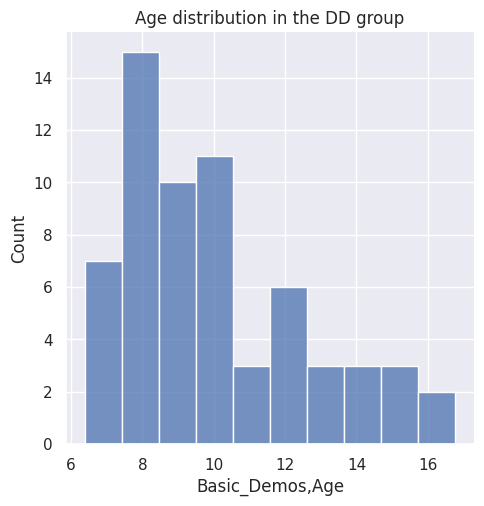

In [ ]:
sns.displot(final_data[final_data['Group'] == 'DD']['Basic_Demos,Age'],
             binwidth = 1)
pl.title('Age distribution in the DD group');

In [ ]:
print('Number of DD participants: ', final_data[final_data['Group'] != 'Control'].shape[0])
print('Number of DD participants younger than 8 y.o.: ', final_data[(final_data['Group'] != 'Control') & (final_data['Basic_Demos,Age'] < 8)].shape[0])
print('Number of DD participants older than 8 y.o.: ', final_data[(final_data['Group'] != 'Control') & (final_data['Basic_Demos,Age'] >= 8)].shape[0])

Number of DD participants:  351
Number of DD participants younger than 8 y.o.:  104
Number of DD participants older than 8 y.o.:  247


In [ ]:
final_data.to_csv(
    Path(working_path).joinpath('final_data.csv')
)
final_data['Identifiers'].to_csv(
    Path(working_path).joinpath('final_ids.csv')
)